<div align='center' ><font size='6'>SVM与Soft Max梯度下降法</font></div> 

## 实习要求：
1. 完成对指定HelloRS32数据集的读取和抽样展示；
2. 实现SVM和Softmax损失函数的损失值及其解析梯度计算，并将解析梯度与数值梯度进行对比验证；
3. 实现简单的基于SVM和Softmax损失的线性分类器训练，打印训练过程，输出模型在训练数据集上的总体精度，比较两个分类器的训练用时；
4. 将HelloRS32数据集分为训练集(train)、验证集(val)和测试集(test)，并通过调校超参数找到两个分类器的最优超参数组合，然后输出分类器在测试集上的总体精度；
5. 确定最优超参数后，将两个线性分类器的权重可视化为RGB图像进行显示；
6. 从测试集中对每个类别的图像样本进行抽样展示，展示时设法对正确预测和错误预测的样本进行区分，分析与定量评价的精度是否相符（**该部分无示例代码，需要自行编写**）。

## HelloRS32数据集图像的读取

In [1]:
%load_ext autoreload
%autoreload 2
from svm_softmax_sgd import *
import cv2

# print(os.path.abspath('.'))
# 加载数据集
root = "E:/python/jupyter/lab1/Quiz/RS32/all"
filename = "E:/python/jupyter/lab1/Quiz/RS32/all.csv"
name2label = gen_map(root)
print(name2label)
gen_csv(root,filename,name2label)
X,Y = load_data(filename)    

# 数据集划分
num_train = int(len(X) * 0.6)
num_val = int(len(X) * 0.1)
num_test = int(len(X) * 0.3)
Xtrain = X[:num_train]
Ytrain = Y[:num_train]
Xval = X[num_train:num_train + num_val]
Yval = Y[num_train:num_train + num_val]
Xtest = X[num_train + num_val:]
Ytest = Y[num_train + num_val:]
Xtest_show = Xtest
print('Xtest_show.shape:', Xtest_show.shape)
print('Xtrain.shape:', Xtrain.shape)
print('Ytrain.shape:', Ytrain.shape)
print('Xval.shape:', Xval.shape)
print('Yval.shape:', Yval.shape)
print('Xtest.shape:', Xtest.shape)
print('Xtest.shape:', Ytest.shape)

{'0Waters': 0, '1Forest': 1, '2CultivatedLand': 2, '3River': 3, '4Highway': 4, '5Pylon': 5, '6SwimmingPool': 6, '7TennisCourt': 7, '8BasketballCourt': 8, '9FootballField': 9}
Xtest.shape: (3841, 32, 32, 3)
Xtrain.shape: (7680, 32, 32, 3)
Ytrain.shape: (7680,)
Xval.shape: (1280, 32, 32, 3)
Yval.shape: (1280,)
Xtest.shape: (3841, 32, 32, 3)
Xtest.shape: (3841,)


## 数据显示及预处理

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


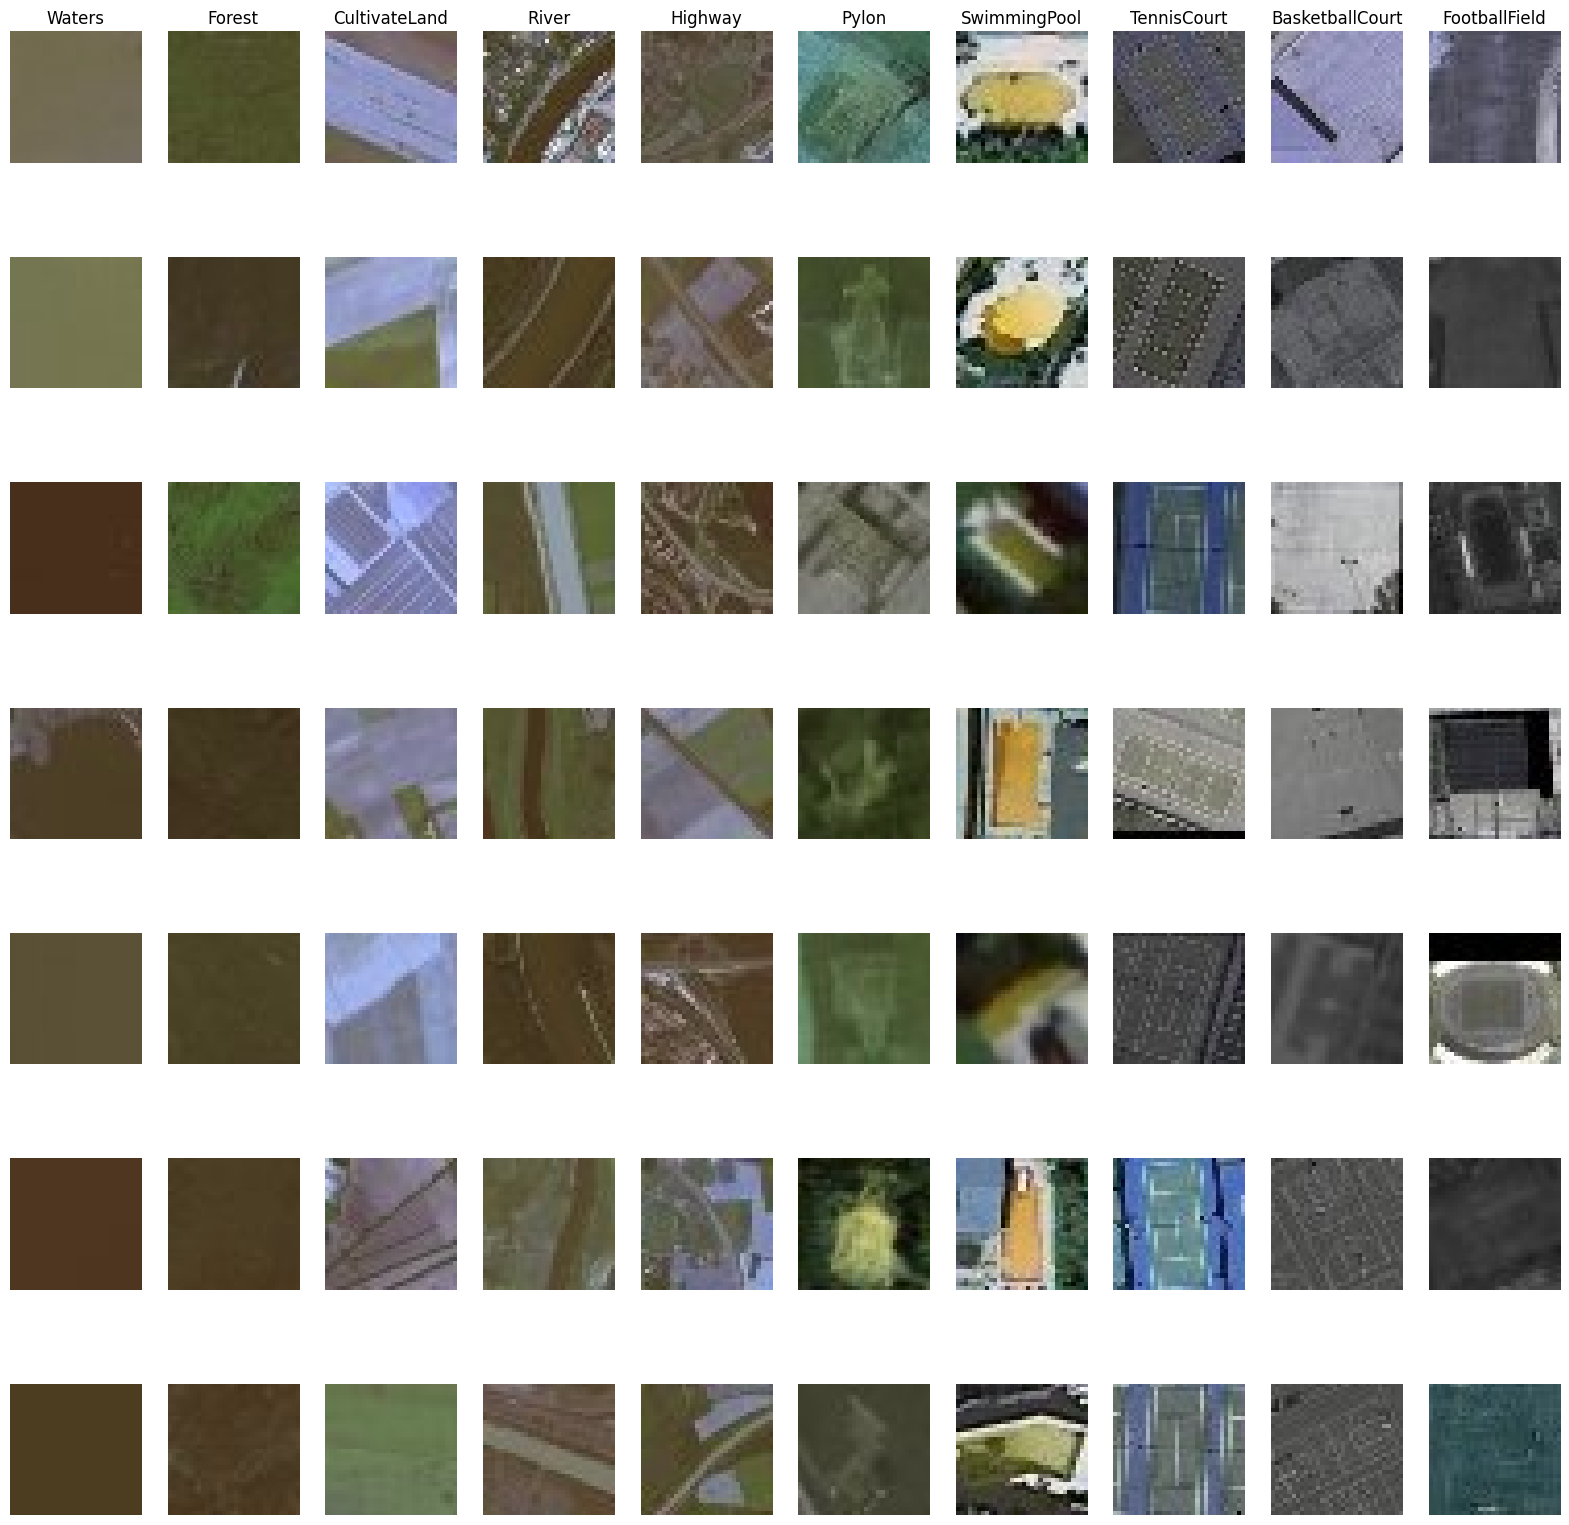

Xtrain.shape: (7680, 3073)
Ytrain.shape: (7680,)
Xval.shape: (1280, 3073)
Yval.shape: (1280,)
Xtest.shape: (3841, 3073)
Xtest.shape: (3841,)


In [2]:
#数据显示
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2
visualize_samples(classes, Xtrain, Ytrain)

# 数据预处理
Xtrain, Xval, Xtest = data_processing(Xtrain, Xval, Xtest)
print('Xtrain.shape:', Xtrain.shape)
print('Ytrain.shape:', Ytrain.shape)
print('Xval.shape:', Xval.shape)
print('Yval.shape:', Yval.shape)
print('Xtest.shape:', Xtest.shape)
print('Xtest.shape:', Ytest.shape)

## 比较数值梯度与解析梯度

In [3]:
# generate a random SVM weight matrix of small numbers
%load_ext autoreload
%autoreload 2
W = np.random.randn(Xtrain.shape[1], len(classes)) * 0.0001
svm_grad_check(W, Xtrain[:100, :], Ytrain[0:100])
softmax_grad_check(W, Xtrain[:100, :], Ytrain[0:100])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
numerical: -82.140000 analytic: -82.140000, error: 8.279285e-13
numerical: 64.900000 analytic: 64.900000, error: 3.327617e-12
numerical: -14.690000 analytic: -14.690000, error: 1.456673e-11
numerical: 14.230000 analytic: 14.230000, error: 9.193240e-13
numerical: 0.650000 analytic: 0.650000, error: 3.259316e-11
numerical: 32.760000 analytic: 32.760000, error: 4.939205e-12
numerical: 147.390000 analytic: 147.390000, error: 1.978470e-13
numerical: -8.420000 analytic: -8.420000, error: 1.133398e-11
numerical: 43.930000 analytic: 43.930000, error: 1.986220e-12
numerical: 138.390000 analytic: 138.390000, error: 1.581380e-13
numerical: 102.083073 analytic: 102.083073, error: 3.359663e-12
numerical: -186.253939 analytic: -186.253939, error: 7.423059e-13
numerical: 111.498901 analytic: 111.498901, error: 1.788737e-12
numerical: 74.988689 analytic: 74.988689, error: 1.489806e-12
numerical: -198.062850 analyti

## 训练简单的SVM和Softmax线性分类器，并比较运行时间

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
iteration 0 / 1500: loss 432.067453
iteration 100 / 1500: loss 238.324238
iteration 200 / 1500: loss 148.003336
iteration 300 / 1500: loss 91.395682
iteration 400 / 1500: loss 60.589346
iteration 500 / 1500: loss 37.858237
iteration 600 / 1500: loss 23.707193
iteration 700 / 1500: loss 17.343753
iteration 800 / 1500: loss 14.106176
iteration 900 / 1500: loss 11.505395
iteration 1000 / 1500: loss 10.949240
iteration 1100 / 1500: loss 11.117218
iteration 1200 / 1500: loss 11.391267
iteration 1300 / 1500: loss 7.064587
iteration 1400 / 1500: loss 10.161488
That took 26.272293s
training accuracy: 0.143099


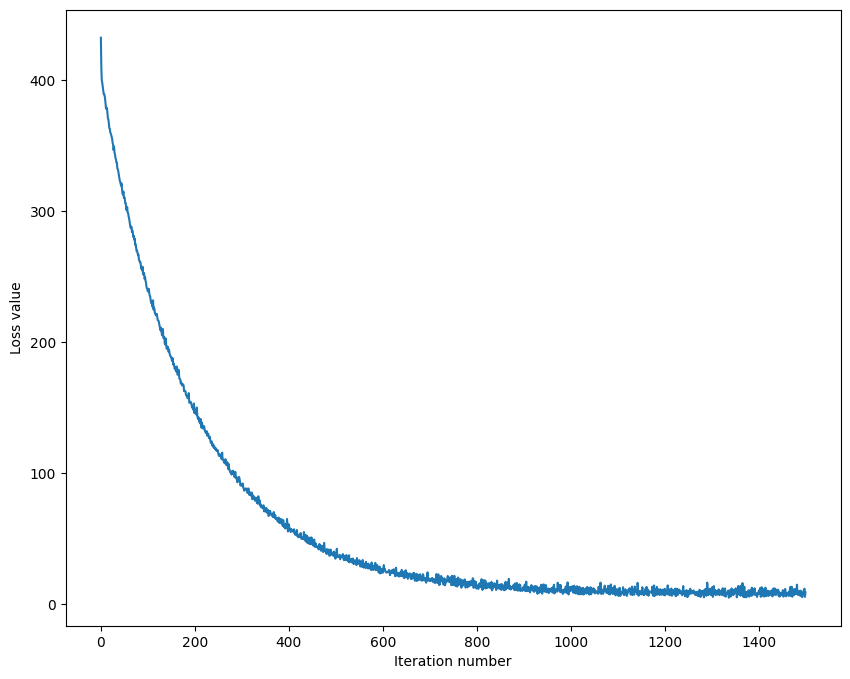

iteration 0 / 1500: loss 403.553083
iteration 100 / 1500: loss 235.629678
iteration 200 / 1500: loss 142.740578
iteration 300 / 1500: loss 87.246233
iteration 400 / 1500: loss 53.251013
iteration 500 / 1500: loss 32.820903
iteration 600 / 1500: loss 20.517870
iteration 700 / 1500: loss 13.019081
iteration 800 / 1500: loss 8.539191
iteration 900 / 1500: loss 5.870580
iteration 1000 / 1500: loss 4.291403
iteration 1100 / 1500: loss 3.322039
iteration 1200 / 1500: loss 2.648592
iteration 1300 / 1500: loss 2.456221
iteration 1400 / 1500: loss 2.147746
That took 43.517394s
training accuracy: 0.448568


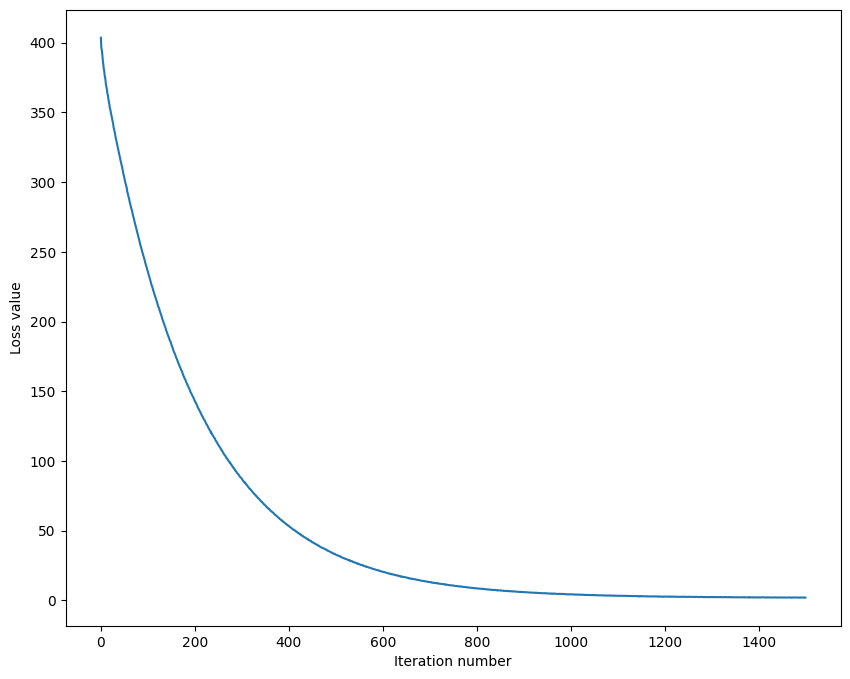

In [4]:
# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

svm = train_a_simple_svm(Xtrain, Ytrain)
softmax = train_a_simple_softmax(Xtrain, Ytrain)

SVM训练时间为26s，训练精度为0.14309，softmax训练时间为43s，训练精度为0.448568
可知，softmax训练时间大致为SVM的2倍，但训练精度为SVM的3倍
所以此处softmax训练效果明显优于SVM

## 训练并找到最佳精度的SVM和Softmax分类器

In [6]:
best_val, best_svm, best_loss_hist = train_and_get_best_svm(Xtrain, Ytrain, Xval, Yval)
best_val, best_softmax, best_loss_hist = train_and_get_best_softmax(Xtrain, Ytrain, Xval, Yval)
y_svm_pred = best_svm.predict(Xtest)
y_acc_svm = best_svm.eval(Ytest, y_svm_pred)
y_softmax_pred = best_softmax.predict(Xtest)
y_acc_softmax = best_softmax.eval(Ytest, y_softmax_pred)
print('best validation svm scroces %f at test data' % np.mean(Ytest == y_svm_pred))
print('best validation softmax scroces %f at test data' % np.mean(Ytest == y_softmax_pred))

start tuning best svm
lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.121354 val accuracy: 0.111719
lr 1.000000e-07 reg 3.000000e+04 train accuracy: 0.440365 val accuracy: 0.384375
lr 1.000000e-06 reg 2.500000e+04 train accuracy: 0.179036 val accuracy: 0.156250
lr 1.000000e-06 reg 3.000000e+04 train accuracy: 0.263411 val accuracy: 0.262500
best validation accuracy achieved during cross-validation: 0.384375
start tuning best softmax
lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.484375 val accuracy: 0.457031
lr 1.000000e-07 reg 3.000000e+04 train accuracy: 0.514974 val accuracy: 0.474219
lr 1.000000e-06 reg 2.500000e+04 train accuracy: 0.164193 val accuracy: 0.142187
lr 1.000000e-06 reg 3.000000e+04 train accuracy: 0.125911 val accuracy: 0.102344
best validation accuracy achieved during cross-validation: 0.474219
training accuracy: 0.387139
training accuracy: 0.479823
best validation svm scroces 0.387139 at test data
best validation softmax scroces 0.479823 at test data


## 权重可视化

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
leanring weight of svm:/n


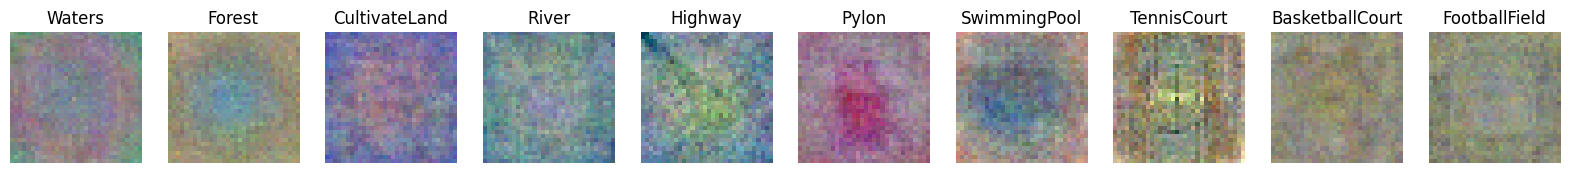

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def visualize_learned_weights(classifier, classes):
    # Visualize the learned weights for each class.
    # Depending on your choice of learning rate and regularization strength, these may
    # or may not be nice to look at.
    w = classifier.W[:-1, :]  # strip out the bias
    w = w.reshape(32,32, 3, len(classes))
    w_min, w_max = np.min(w), np.max(w)

    for i in range(len(classes)):
        # plt_idx = i * num_classes + y + 1  # 在子图中所占位置的计算
        plt.subplot(2, len(classes), i + 1)
        # plt.subplot(1, 4, i + 1)

        # Rescale the weights to be between 0 and 255
        wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
        plt.imshow(wimg.astype('uint8'))
        plt.axis('off')
        plt.title(classes[i])
    plt.show()
print('leanring weight of svm:\n')
visualize_learned_weights(best_svm, classes)

leanring weight of softmax:/n


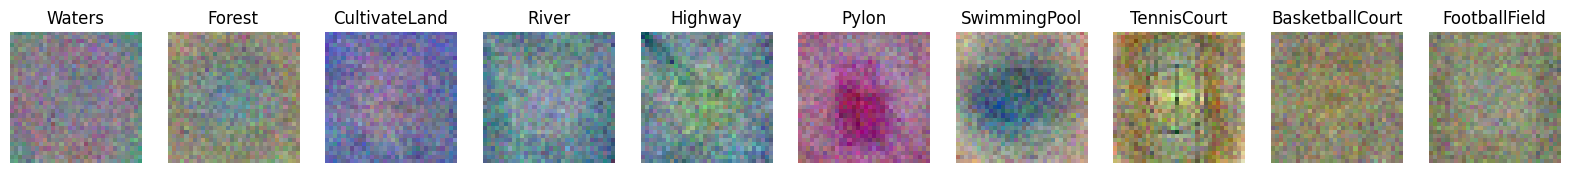

In [10]:
print('leanring weight of softmax:\n')
visualize_learned_weights(best_softmax, classes)

## 测试集预测结果可视化

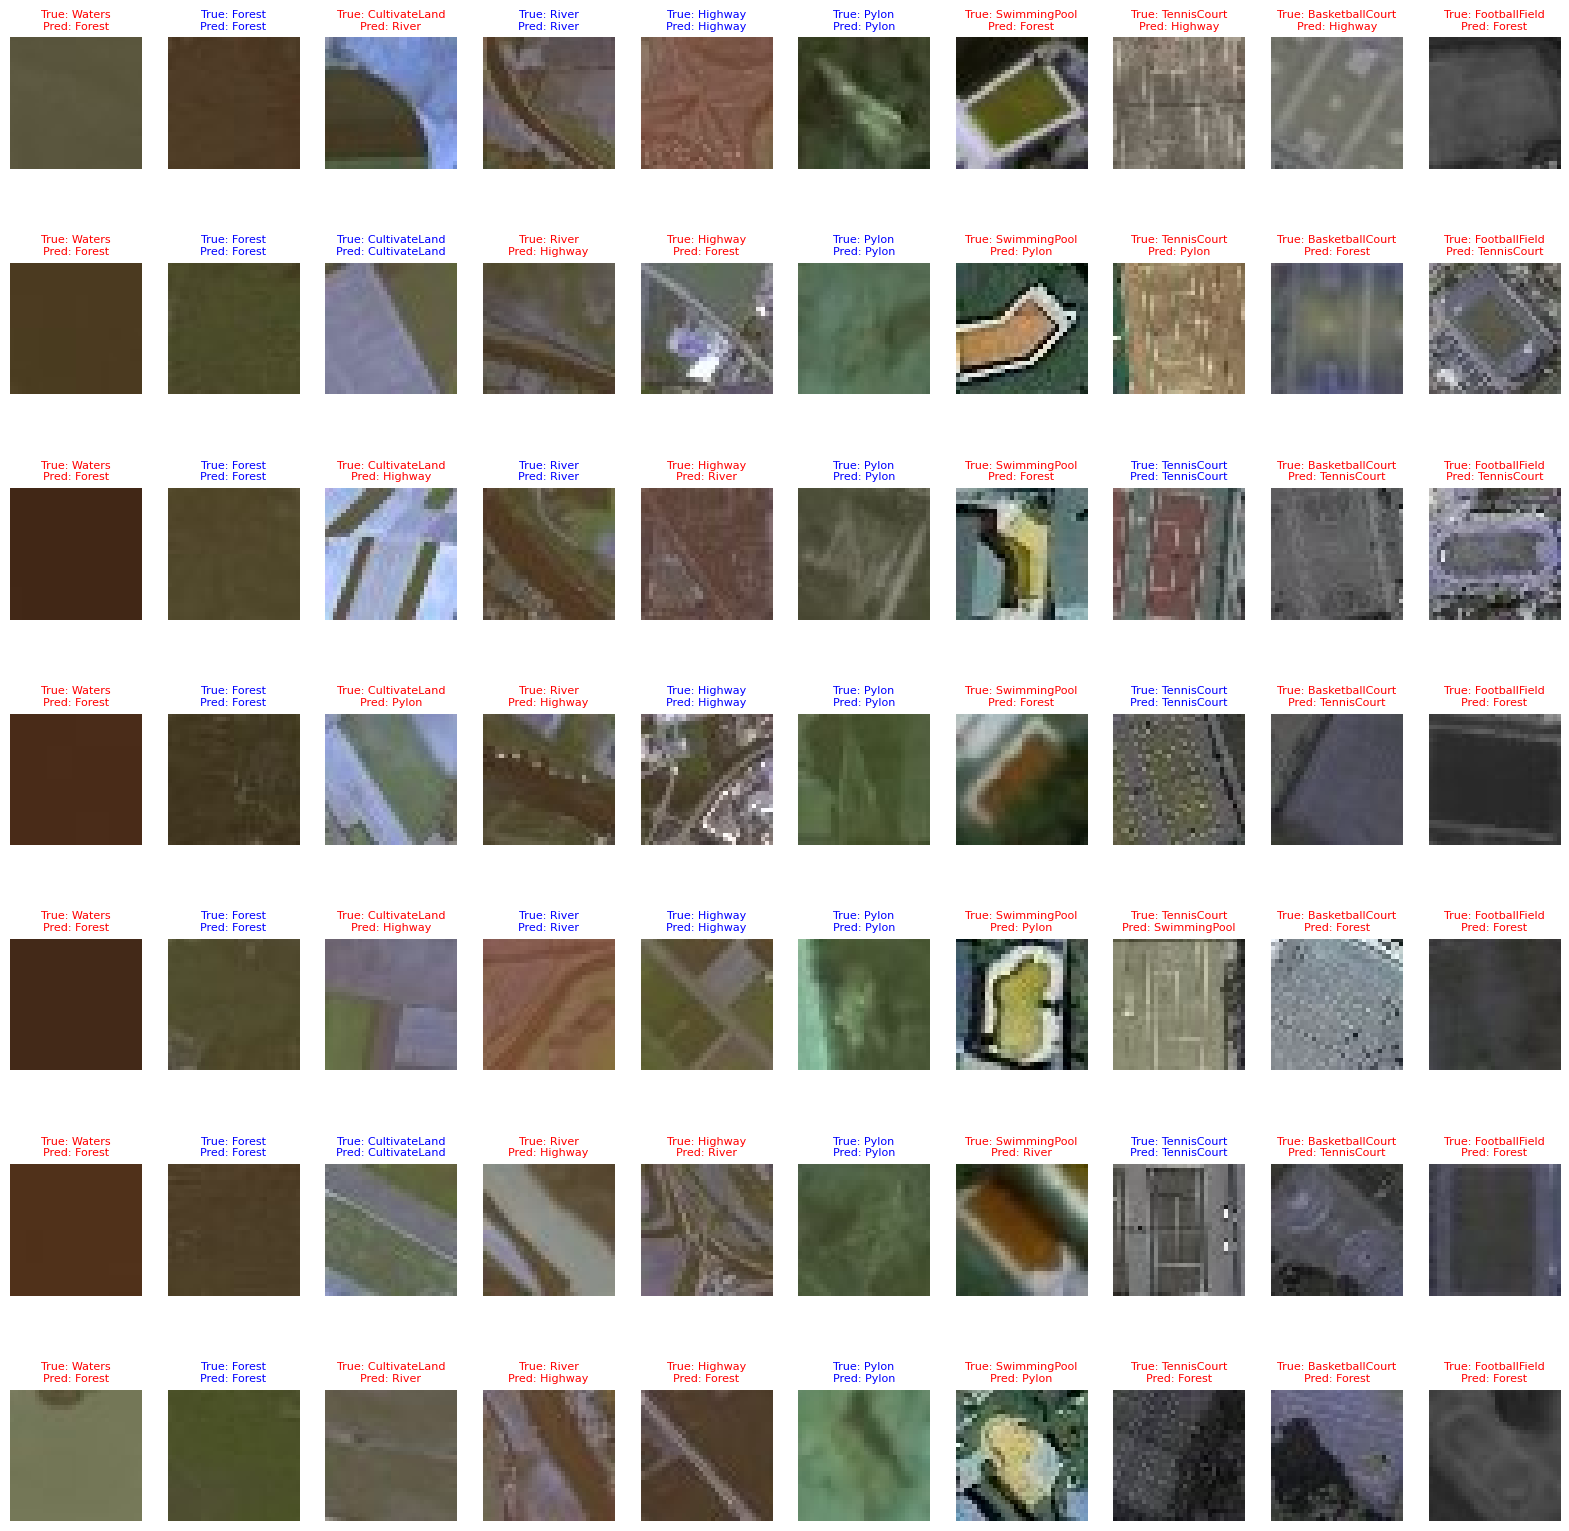

the accuracy is:  0.35714285714285715


In [15]:
def visualize_results(classes, X, Y_true, Y_pred):
    num_classes = len(classes)
    samples_per_class = 7
    font1 = {'color':'blue','size':8}
    font2 = {'color':'red','size':8}
    correct = 0
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(Y_true == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X[idx])
            plt.axis('off')
            if Y_true[idx] == Y_pred[idx]:
                correct += 1
                font = font1
            else:
                font = font2
            plt.title(f'True: {classes[Y_true[idx]]}\nPred: {classes[Y_pred[idx]]}',fontdict=font)
    plt.show()
    print('the accuracy is: ',correct/70)

visualize_results(classes,Xtest_show,Ytest,y_svm_pred)

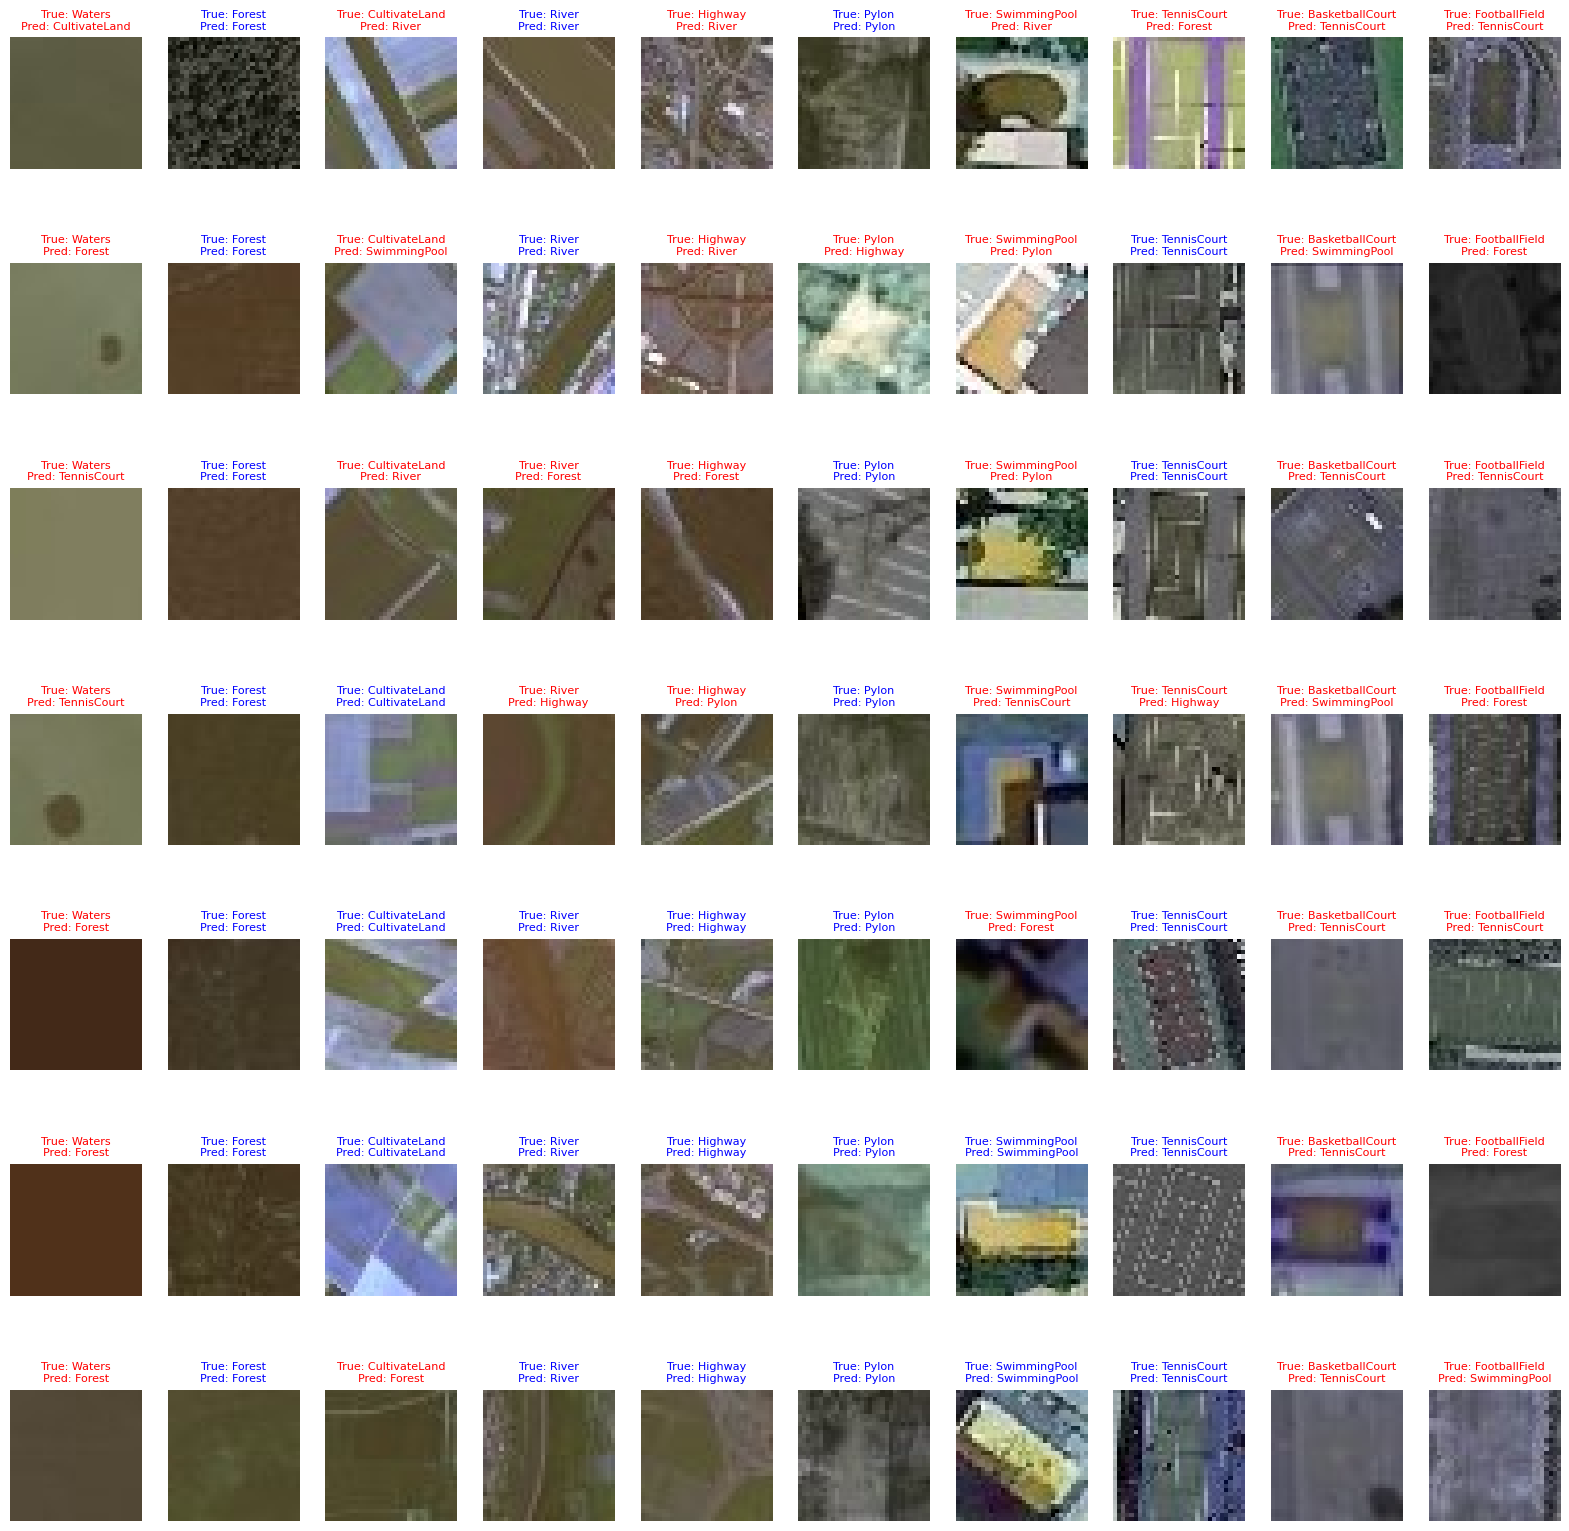

the accuracy is:  0.44285714285714284


In [16]:
visualize_results(classes,Xtest_show,Ytest,y_softmax_pred)

交叉验证时在测试集上，SVM得分为0.387139，softmax得分为0.479823
抽样验证时，由上两个单元可知，标题红色字体为错分，蓝色字体为正确分类，SVM分类精度为0.35714285714285715，softmax分类精度为0.44285714285714284
在相同测试集上，交叉验证与抽样二者精度大致相符，SVM为(0.387139-0.35714285714285715)/0.387139=77.4%,softmax为(0.479823-0.44285714285714284)/0.479823=77.04%